<a href="https://colab.research.google.com/github/Airee66/MAT421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Equations and Regression
### Ainsley Chapman
### Date: 2/12/2023

## 1.1 - Linear Algebra Introduction

Linear algebra is a branch of mathematics that deals with linear equations and their transformations.  This provides a strong foundation for understanding data science and machine learning for numerous practical applications.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.2 - Elements of Linear Algebra

#### Linear Spaces
A linear space is a collection of vectors that can be added together or multiplied by scalars such that the structure of the space is preserved. 

A linear subspace V is a subset of $U ⊑ V$ that is closed under vector addition and scalar mutliplication.  For all $u_1, u_2 \in U$ and $α \in \mathbb{R}$ it holds that $u_1 + u_2 \in U$ and $\alpha u_1 \in U$ 

A span of a set of vectors is a linear subspace.



In [2]:
#Vector Addition
u1 = np.array([3, 2, 1])
u2 = np.array([1, 2, 3])

v = u1 + u2
print(v)

[4 4 4]


In [3]:
# Scalar Multiplication
v = np.array([0, 2, 5, 2])
print(5*v)


[ 0 10 25 10]


A set of vectors is linearly independent  if they cannot be written as a linear combination of the others. i.e. $\forall i, u_i ∉ span({u_j: j \neq i})$

#### Orthogonality

An orthonormal basis is a set of linearly independent vectors that have a magnitude of 1 and are mutually orthogonal (perpendicular) to each other.  They form a "standard" coordinate system that simplifies calculations and mathematical representations.

In [4]:
#Identity Matrix
I = np.array([[1,0,0], [0,1,0], [0,0,1]])
print(I)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [5]:
#Orthogonal Matrix
Orth = np.array([[2, 0], [0, 2]])
print(Orth)

[[2 0]
 [0 2]]


In [6]:
#Verify that matrix is indeed orthogonal
column1 = Orth[:, 0]
column2 = Orth[:, 1]

print('Dot product of columns to verify orthonormality: ', np.dot(column1, column2)) #This should be equal to zero

Dot product of columns to verify orthonormality:  0


#### Gram-Schmidt Process

The Gram-Shmidt Process is an algorithm for constructing an orthonormal basis from a set of linearly independent vectors by taking advantage of the properties of orthogonal projection.

In [7]:
def gram_schmidt(vectors):
    basis = []
    for v in vectors:
        w = v - np.sum([np.dot(v, b) * b for b in basis], axis=0)
        if (np.linalg.norm(w) > 1e-10):
            basis.append(w / np.linalg.norm(w))
    return np.array(basis)

vectors = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])
basis = gram_schmidt(vectors)
print(basis)

[[ 0.26726124  0.53452248  0.80178373]
 [ 0.87287156  0.21821789 -0.43643578]]


#### Eigenvalues and Eigenvectors

An eigenvalue ($λ$) is a scalar value that represents a characteristic of a linear transformation of a square matrix.

An Eigenvector ($x$) is a vector that describes the direction in which the linear transformation has taken place.

$λ $ is an eigenvalue of $A$ if there exists a nonzero vector $x \neq 0$ such that: 
$Ax = \lambda x$

In [8]:
from numpy.linalg import eig

A = np.array([[3, -1, 2], [1, 2, 1], [2, 1, 3]])
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues: [5. 2. 1.]
Eigenvectors:
[[-5.27046277e-01 -5.77350269e-01 -7.07106781e-01]
 [-4.21637021e-01  5.77350269e-01  4.31088651e-16]
 [-7.37864787e-01  5.77350269e-01  7.07106781e-01]]


## 1.3 - Linear Regression

#### QR Decomposition
QR decomposition, also called QR factorization, is useful for solving linear systems of equations and least squares problems.  Matrix $A$ is decomposed into two matrices, Q (an orthogonal matrix), and R (an upper triangular matrix).

$A = QR$



In [9]:
import sympy as sp

A = np.random.randint(10, size=(5, 5))
print(A)

[[4 3 3 3 0]
 [7 7 4 4 6]
 [0 3 5 7 8]
 [8 4 0 8 0]
 [1 1 4 2 2]]


In [10]:
#checking for independence
rref_A = sp.Matrix(A).rref()
print(rref_A)

#gs_A = gram_schmidt(A)
#print(gs_A)

#print(sp.Matrix(gs_A).rref())
#sp.Matrix(basis).rref()

(Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]]), (0, 1, 2, 3, 4))


In [12]:
Q, R = np.linalg.qr(A)
  
# Print the result
print("QR decomposition of matrix:")
print( "Q=\n", Q, "\nR=\n", R)

QR decomposition of matrix:
Q=
 [[-0.35082321 -0.02689723 -0.38800752  0.21417573 -0.82448683]
 [-0.61394061 -0.48415008  0.33831445  0.46600437  0.23887002]
 [-0.         -0.74927988 -0.12398171 -0.64499913 -0.08476033]
 [-0.70164642  0.44572547  0.0040156  -0.53729328  0.14255146]
 [-0.0877058  -0.0691643  -0.84829588  0.17961275  0.48544552]] 
R=
 [[-11.40175425  -8.24434538  -3.85905528  -9.296815    -3.85905528]
 [  0.          -4.00384431  -6.04034861  -3.83477602  -9.03746815]
 [  0.           0.          -3.82385682  -2.34310366  -0.6585587 ]
 [  0.           0.           0.          -5.94757     -2.00474134]
 [  0.           0.           0.           0.           1.7260285 ]]


#### Least Squares

Suppose $Ax = b$ is not consistent or does not have a solution.  We can approximate a solution using Least Squares.  In other words, we can use $Ax$ to approximate $b$.  

#### linear Regression

Below we are solving for $b$ with a randomly generated $y$ vector using the output generated from QR decomposition above and comparing it to the result generated from the numpy library least squares function.


In [13]:
y = np.random.randint(10, size=(5))
print(y)

#from QR decomposition
b_qr = np.linalg.solve(R, Q.T@y)
print(b_qr)

#built in least squares function (numpy)
b_lstsq, res, rank, sv = np.linalg.lstsq(A,y)
print(b_lstsq)

[5 3 8 7 2]
[-1.62946429  2.13392857  0.26785714  1.4375     -1.22544643]
[-1.62946429  2.13392857  0.26785714  1.4375     -1.22544643]


<ipython-input-13-e52567b79f3d>:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_lstsq, res, rank, sv = np.linalg.lstsq(A,y)


## 1.4 - Principal Component Analysis

Principle component analysis reduces the dimensionality of a data set while retaining as much information as possible. This is achieved by transforming the original variables into a new set of orthogonal variables, called principal components, which are linear combinations of the original variables

#### Singular Value Decomposition

$A = U∑V^T$



In [14]:
U, sigma, Vtran = np.linalg.svd(A)
print("orthogonal matrix U: \n" , U)
print("\n sigma vector: \n" , sigma)
print("\n V transpose matrix: \n" , Vtran)

orthogonal matrix U: 
 [[-0.29190975  0.20344708  0.14303003  0.6421324  -0.66378187]
 [-0.61331253  0.00214144  0.70531941 -0.34401679  0.08955519]
 [-0.49896789 -0.68955865 -0.46485151 -0.12265277 -0.21073511]
 [-0.49733697  0.65997065 -0.51222136 -0.10500246  0.20904171]
 [-0.20572656 -0.21806492  0.06007735  0.66576964  0.6806363 ]]

 sigma vector: 
 [20.16849199  9.22162092  4.86924132  3.17746882  0.62275141]

 V transpose matrix: 
 [[-0.47823353 -0.43934346 -0.32955984 -0.55591184 -0.40077718]
 [ 0.63876826  0.10610641 -0.40135524  0.06892843 -0.64411131]
 [ 0.30223652  0.40724278  0.23954853 -0.81762408  0.13005293]
 [-0.00435503 -0.19006287  0.81830693  0.05768121 -0.53935498]
 [ 0.52144216 -0.77055056  0.05739824 -0.11989425  0.34158558]]


#### Low-Rank Matrix Approximations
Low-rank matrix approximation uses singular value decomposition (SVD) wich allows us to evaluate the distance between two matrices.

In [15]:
#from mpmath.libmp.libelefun import xrange
#def LRA(SVD=None, Ar=None, r=1):

#  lrma_A = np.zeros((len(U), len(Vtran)))
#  for i in xrange(r):
#    lrma_A += sigma[i] * np.outer(U.T[i], Vtran[i])
#    return lrma_A

#LRA(A)

#### Principal Component Analysis

Principal Component Analysis (PCA) reduces the dimensionality of a data set and transforms it so as to to to examine variance within the data set.  Each principal component is an eigenvector corresponding to an eigenvalue (going from largest to smallest). 

PCA allows us to better visualize and analyze datasets.

PCA is performed on a dataset below for two and three principal components.

(150, 2)


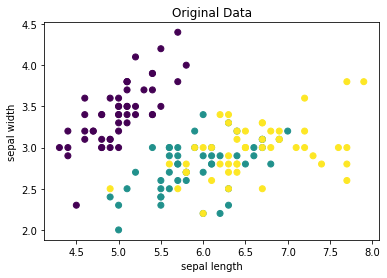

In [20]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca.shape)

#Original Data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

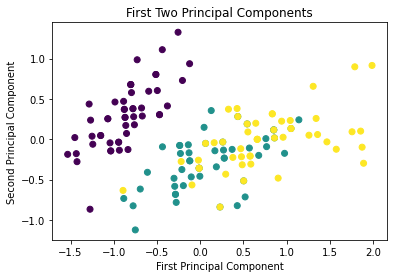

In [17]:
#First Two Principal Components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("First Two Principal Components")
#plt.colorbar()
plt.show()


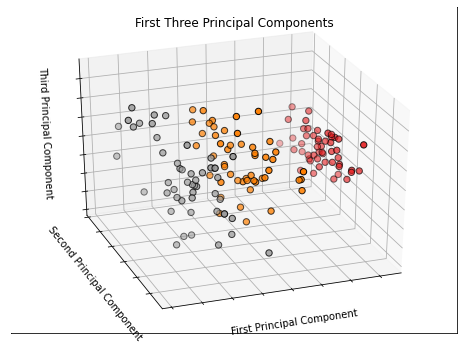

In [21]:
#Three Principal Components
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(1, figsize=(8, 6))

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First Three Principal Components")
ax.set_xlabel("First Principal Component")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Second Principal Component")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Third Principal Component")
ax.zaxis.set_ticklabels([])

plt.show()